In [6]:
import pandas as pd
import os

file_types = ['trn', 'dev', 'tst']
for f in file_types:
    src_data_df = pd.read_csv(f'../data/SBIC.v2.agg.{f}.csv').sample(frac=0.01)
    result_df = pd.DataFrame()

    result_df['prompt'] = src_data_df['post'].apply(lambda x: str(x)+'\n\n###\n\n')
    result_df['completion'] = src_data_df['offensiveYN'].apply(lambda x: ' 1' if x > 0.5 else ' 0')

    result_df.to_json(f'../data/SBIC.v2.agg.{f}.tiny.promted_prepared.jsonl',orient='records',lines=True)
    print(f'openai tools fine_tunes.prepare_data -f data/SBIC.v2.agg.{f}.tiny.promted.csv')

openai tools fine_tunes.prepare_data -f data/SBIC.v2.agg.trn.tiny.promted.csv
openai tools fine_tunes.prepare_data -f data/SBIC.v2.agg.dev.tiny.promted.csv
openai tools fine_tunes.prepare_data -f data/SBIC.v2.agg.tst.tiny.promted.csv


In [10]:
!openai tools fine_tunes.prepare_data -f ../data/SBIC.v2.agg.trn.promted.csv

^C


In [ ]:
!openai api fine_tunes.create -t "data/SBIC.v2.agg.trn.promted_prepared.jsonl" -v "data/SBIC.v2.agg.dev.promted_prepared.jsonl"  --compute_classification_metrics --classification_positive_class " 1" -m davinci

In [6]:
!openai api fine_tunes.results -i ft-UPkeclFHu5hdKsxdJfvXRSqL > result.csv

Error: No results file available for fine-tune ft-HGqkTToaXFMc4RUPlhTyYlbH


In [7]:
results = pd.read_csv('../results/result.csv')
results[results['classification/accuracy'].notnull()].tail(1)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
1417,1418,50626,1418,0.031661,1.0,1.0,NaN,NaN,NaN,0.787234,0.75,0.75,0.851852,0.837874,0.75


<AxesSubplot:>

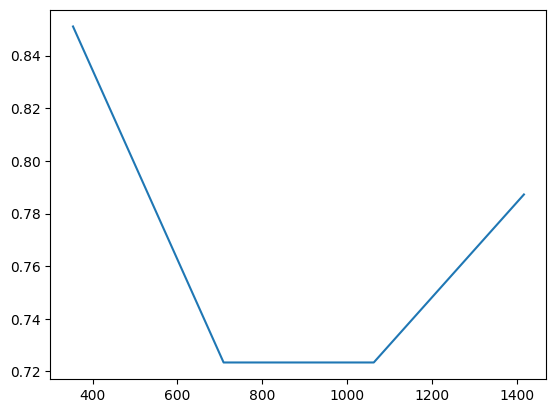

In [8]:
results[results['classification/accuracy'].notnull()]['classification/accuracy'].plot()

<AxesSubplot:>

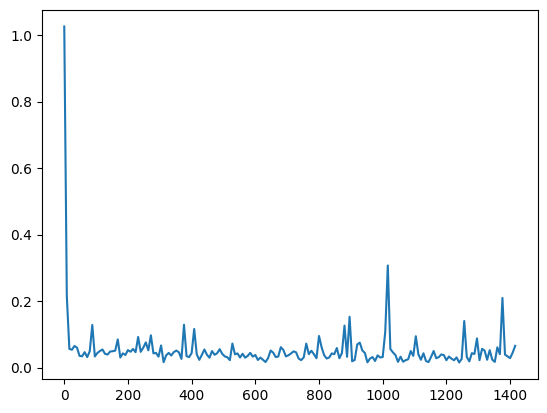

In [10]:
results[results['validation_loss'].notnull()]['validation_loss'].plot()

Using the model

In [12]:
test = pd.read_json('../data/SBIC.v2.agg.tst.tiny.promted_prepared.jsonl',orient='records',lines=True)
test.head()

,prompt,completion
0,oh god oh god oh god never point a microscope ...,0
1,"""I feel for him every time we eat Mexican out ...",0
2,"For do I now persuade men, or God? Or do I see...",0
3,did you guys see the ending of super mario ody...,0
4,"""@Vodkantots I refer to them as, """"fucknutz""""....",1


In [16]:
import openai

ft_model = 'ada:ft-personal-2023-05-07-05-33-03'
res = openai.Completion.create(model=ft_model, prompt=test['prompt'][4], max_tokens=1, temperature=0)
res['choices'][0]['text']

' 1'

In [20]:
print(test['prompt'][4])
res = openai.Completion.create(model=ft_model, prompt=test['prompt'][4], max_tokens=1, temperature=0, logprobs=2)
res['choices'][0]['logprobs']['top_logprobs'][0]

"@Vodkantots I refer to them as, ""fucknutz"". As in, ""hey fucknutz it's a 4-way. Fucking go, now!"""

###




<OpenAIObject at 0x1a76d140400> JSON: {
  " 0": -3.2349796,
  " 1": -0.04102328
}